In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import torch

from train.models.encoder_resnet import EncoderResnet

model_path = 'encoder-model.pt'


model = EncoderResnet(512)
model.load_state_dict(torch.load(model_path, map_location='cpu'))

/Users/kim-seung-gyeom/opt/anaconda3/envs/ml/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/kim-seung-gyeom/opt/anaconda3/envs/ml/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


<All keys matched successfully>

In [9]:
from torch.utils.data import DataLoader
import dataset as d
import pandas as pd
test_data = pd.read_csv('./data/open/test_data.csv')
test_transform = d.ImageTransForm(224)
test_dataset = d.CustomDataset(test_data, 'test', transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=32)
print()

In [39]:
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

device = torch.device('cpu')

predcit = []
mos_y = []
a = 0
model.eval()
with torch.no_grad():
    for img, mos, comment in test_loader:
        print(img.shape)
        x = img.to(device)
        y = mos.to(device)
        if type(model).__name__ == 'EncoderGoogleNet':
           mos_pred = model(x)
        else:
           out, mos_pred = model(x)
        print(len(y.tolist()))
        print(len(mos_pred.reshape(-1).tolist()))
        predcit += mos_pred.reshape(-1).tolist()
        mos_y += y.tolist()
        a += 1
        if a== 100:
            break

torch.Size([32, 3, 224, 224])
32
32
torch.Size([32, 3, 224, 224])
32
32
torch.Size([32, 3, 224, 224])
32
32
torch.Size([32, 3, 224, 224])
32
32
torch.Size([32, 3, 224, 224])
32
32
torch.Size([32, 3, 224, 224])
32
32
torch.Size([32, 3, 224, 224])
32
32
torch.Size([32, 3, 224, 224])
32
32
torch.Size([32, 3, 224, 224])
32
32
torch.Size([32, 3, 224, 224])
32
32
torch.Size([32, 3, 224, 224])
32
32
torch.Size([32, 3, 224, 224])
32
32
torch.Size([32, 3, 224, 224])
32
32
torch.Size([32, 3, 224, 224])
32
32
torch.Size([32, 3, 224, 224])


/Users/kim-seung-gyeom/opt/anaconda3/envs/ml/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


32
32
torch.Size([32, 3, 224, 224])
32
32
torch.Size([32, 3, 224, 224])
32
32
torch.Size([32, 3, 224, 224])
32
32
torch.Size([32, 3, 224, 224])
32
32
torch.Size([32, 3, 224, 224])
32
32
torch.Size([32, 3, 224, 224])
32
32
torch.Size([32, 3, 224, 224])
32
32
torch.Size([32, 3, 224, 224])
32
32
torch.Size([32, 3, 224, 224])
32
32
torch.Size([32, 3, 224, 224])
32
32
torch.Size([32, 3, 224, 224])
32
32
torch.Size([32, 3, 224, 224])
32
32
torch.Size([32, 3, 224, 224])
32
32
torch.Size([32, 3, 224, 224])
32
32
torch.Size([32, 3, 224, 224])
32
32
torch.Size([32, 3, 224, 224])
32
32
torch.Size([32, 3, 224, 224])
32
32
torch.Size([32, 3, 224, 224])
32
32
torch.Size([32, 3, 224, 224])
32
32
torch.Size([32, 3, 224, 224])
32
32
torch.Size([32, 3, 224, 224])
32
32
torch.Size([32, 3, 224, 224])
32
32
torch.Size([32, 3, 224, 224])
32
32
torch.Size([32, 3, 224, 224])
32
32
torch.Size([32, 3, 224, 224])
32
32
torch.Size([32, 3, 224, 224])
32
32
torch.Size([32, 3, 224, 224])
32
32
torch.Size([32, 3, 224

In [40]:
len(mos_y)

3200

In [41]:
len(predcit)

3200

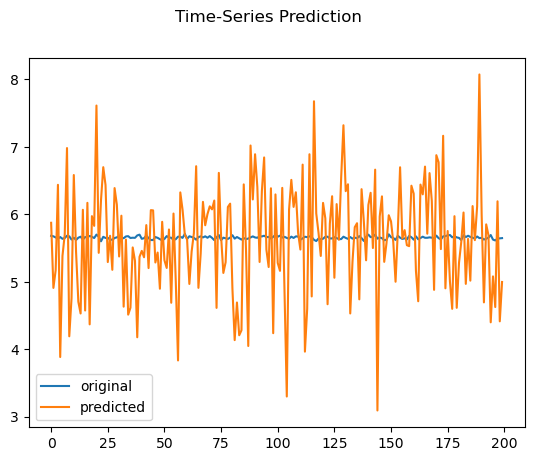

In [44]:
import matplotlib.pyplot as plt

#plt.axvline(x=train_size, c='r', linestyle='--')
plt.plot(predcit[100:300], label='original')
plt.plot(mos_y[100:300],label='predicted' )
plt.suptitle('Time-Series Prediction')
plt.legend(loc='best')
plt.show()